In [2]:
import pandas as pd
import datetime 

In [3]:
Transactions = pd.read_csv('C:/Users/N.SRIHARINI/Desktop/case studies/python/case study 2/Transactions.csv')
Product_hierarchy = pd.read_csv('C:/Users/N.SRIHARINI/Desktop/case studies/python/case study 2/prod_cat_info.csv')
Customer = pd.read_csv('C:/Users/N.SRIHARINI/Desktop/case studies/python/case study 2/Customer.csv')

# Q1 Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [4]:
Customer_Trans = pd.merge(left = Transactions,
                          right = Customer,
                          left_on = 'cust_id',
                          right_on = 'customer_Id',
                          how = 'inner',
                          indicator = True)
Customer_Trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,both
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,both
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,270351,26-09-1981,M,5.0,both
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,270351,26-09-1981,M,5.0,both
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,270351,26-09-1981,M,5.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,16293185603,274931,31-01-2011,8,3,3,137,43.155,454.155,Flagship store,274931,10-06-1972,M,10.0,both
23049,70163958026,267902,30-01-2011,10,5,4,404,169.680,1785.680,e-Shop,267902,17-07-1975,M,4.0,both
23050,20417144530,269556,29-01-2011,10,6,3,654,206.010,2168.010,Flagship store,269556,27-12-1972,M,5.0,both
23051,58531412371,274935,29-01-2011,10,5,4,104,43.680,459.680,Flagship store,274935,09-09-1977,F,3.0,both


In [5]:
Product_hierarchy

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [15]:
Customer_Final = pd.merge(left = Product_hierarchy,
                          right = Customer_Trans,
                          left_on = [Product_hierarchy.prod_sub_cat_code,Product_hierarchy.prod_cat_code],
                          right_on = [Customer_Trans.prod_subcat_code,Customer_Trans.prod_cat_code],
                          how = 'inner',
                         )
Customer_Final



,key_0,key_1,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,...,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge
0,4,1,1,Clothing,4,Mens,63126920365,271489,22-05-2011,4,...,4,131,55.020,579.020,TeleShop,271489,21-04-1971,M,9.0,both
1,4,1,1,Clothing,4,Mens,28225110638,275108,29-02-2012,4,...,5,337,176.925,1861.925,e-Shop,275108,04-11-1971,F,8.0,both
2,4,1,1,Clothing,4,Mens,89285035990,268487,2/2/2011,4,...,4,850,357.000,3757.000,e-Shop,268487,10-06-1984,F,2.0,both
3,4,1,1,Clothing,4,Mens,48980542140,268934,21-12-2012,4,...,4,703,295.260,3107.260,Flagship store,268934,18-07-1980,F,7.0,both
4,4,1,1,Clothing,4,Mens,31995208412,268509,1/8/2013,4,...,5,938,492.450,5182.450,TeleShop,268509,17-08-1989,M,10.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,12,6,6,Home and kitchen,12,Tools,5945967674,272071,30-05-2011,12,...,5,216,113.400,1193.400,Flagship store,272071,06-04-1970,F,6.0,both
23049,12,6,6,Home and kitchen,12,Tools,16136391020,267732,19-04-2011,12,...,1,832,87.360,919.360,e-Shop,267732,23-09-1989,F,9.0,both
23050,12,6,6,Home and kitchen,12,Tools,60396257509,267660,11/4/2011,12,...,4,125,52.500,552.500,TeleShop,267660,14-09-1981,M,3.0,both
23051,12,6,6,Home and kitchen,12,Tools,42528871618,270970,3/2/2011,12,...,2,364,76.440,804.440,e-Shop,270970,04-05-1975,M,4.0,both


# Q2 Prepare a summary report for the merged data set.


# Get the column names and their corresponding data types

In [16]:
Customer_Final.dtypes

key_0                   int64
key_1                   int64
prod_cat_code_x         int64
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code_y         int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
_merge               category
dtype: object

# Top 10 observations

In [17]:
Customer_Final.head(10)

,key_0,key_1,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,...,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge
0,4,1,1,Clothing,4,Mens,63126920365,271489,22-05-2011,4,...,4,131,55.020,579.020,TeleShop,271489,21-04-1971,M,9.0,both
1,4,1,1,Clothing,4,Mens,28225110638,275108,29-02-2012,4,...,5,337,176.925,1861.925,e-Shop,275108,04-11-1971,F,8.0,both
2,4,1,1,Clothing,4,Mens,89285035990,268487,2/2/2011,4,...,4,850,357.000,3757.000,e-Shop,268487,10-06-1984,F,2.0,both
3,4,1,1,Clothing,4,Mens,48980542140,268934,21-12-2012,4,...,4,703,295.260,3107.260,Flagship store,268934,18-07-1980,F,7.0,both
4,4,1,1,Clothing,4,Mens,31995208412,268509,1/8/2013,4,...,5,938,492.450,5182.450,TeleShop,268509,17-08-1989,M,10.0,both
5,4,1,1,Clothing,4,Mens,43469248603,268444,6/1/2012,4,...,2,403,84.630,890.630,MBR,268444,02-01-1992,F,6.0,both
6,4,1,1,Clothing,4,Mens,28396777609,269101,19-02-2014,4,...,4,1386,582.120,6126.120,TeleShop,269101,27-06-1980,M,7.0,both
7,4,1,1,Clothing,4,Mens,62216597271,275139,9/10/2011,4,...,5,117,61.425,646.425,e-Shop,275139,12-06-1979,F,8.0,both
8,4,1,1,Clothing,4,Mens,24636440462,273023,20-02-2012,4,...,4,499,209.580,2205.580,MBR,273023,24-07-1988,F,5.0,both
9,4,1,1,Clothing,4,Mens,58956348529,272484,18-02-2014,4,...,4,1443,606.060,6378.060,TeleShop,272484,04-07-1974,F,4.0,both


# Bottom 10 Observations

In [18]:
Customer_Final.tail(10)

,key_0,key_1,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,...,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge
23043,12,6,6,Home and kitchen,12,Tools,96657012557,272380,10/7/2011,12,...,-3,-432,136.080,-1432.080,e-Shop,272380,28-02-1988,F,4.0,both
23044,12,6,6,Home and kitchen,12,Tools,96657012557,272380,1/7/2011,12,...,3,432,136.080,1432.080,e-Shop,272380,28-02-1988,F,4.0,both
23045,12,6,6,Home and kitchen,12,Tools,33006117905,266941,22-06-2011,12,...,5,731,383.775,4038.775,e-Shop,266941,17-08-1990,F,6.0,both
23046,12,6,6,Home and kitchen,12,Tools,13798139048,271308,20-05-2011,12,...,4,1109,465.780,4901.780,Flagship store,271308,12-12-1984,F,4.0,both
23047,12,6,6,Home and kitchen,12,Tools,35945678971,273265,3/6/2011,12,...,1,942,98.910,1040.910,e-Shop,273265,12-12-1972,F,5.0,both
23048,12,6,6,Home and kitchen,12,Tools,5945967674,272071,30-05-2011,12,...,5,216,113.400,1193.400,Flagship store,272071,06-04-1970,F,6.0,both
23049,12,6,6,Home and kitchen,12,Tools,16136391020,267732,19-04-2011,12,...,1,832,87.360,919.360,e-Shop,267732,23-09-1989,F,9.0,both
23050,12,6,6,Home and kitchen,12,Tools,60396257509,267660,11/4/2011,12,...,4,125,52.500,552.500,TeleShop,267660,14-09-1981,M,3.0,both
23051,12,6,6,Home and kitchen,12,Tools,42528871618,270970,3/2/2011,12,...,2,364,76.440,804.440,e-Shop,270970,04-05-1975,M,4.0,both
23052,12,6,6,Home and kitchen,12,Tools,34958490122,266849,20-02-2011,12,...,4,1155,485.100,5105.100,e-Shop,266849,12-10-1979,M,1.0,both


# “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [19]:
import numpy as np
Data_min = Customer_Final['total_amt'].min()
Data_max = Customer_Final['total_amt'].max()
Data_q1  = np.percentile(Customer_Final.total_amt,25)
median  = np.percentile(Customer_Final.total_amt,50)
Data_q3  = np.percentile(Customer_Final.total_amt,75)
print('Min = ',Data_min)
print('Max = ',Data_max)
print('Median = ',median)
print('Q1 = ',Data_q1)
print('Q3 = ',Data_q3)

Min =  -8270.925
Max =  8287.5
Median =  1754.74
Q1 =  762.45
Q3 =  3569.15


# Frequency tables for all the categorical variables

# STORE TYPE

In [20]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['Store_type'])
freq_table.columns = ['TeleShop','MBR','e-shop','Flagshipstore']
freq_table.index = ['Male','Female']
freq_table

,TeleShop,MBR,e-shop,Flagshipstore
Male,2264,2264,2147,4558
Female,2313,2395,2353,4750


# Prod_cat

In [21]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_cat'])
freq_table.columns = ['Books','Bags','Clothing','Footwear','Electronics','Home and kitchen']
freq_table.index = ['Male','Female']
freq_table

,Books,Bags,Clothing,Footwear,Electronics,Home and kitchen
Male,994,2949,1439,2328,1529,1994
Female,1004,3116,1518,2570,1469,2134


# prod_subcat

In [22]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_subcat'])
freq_table.columns = ['Men','Women','Kid','Mobile','Computer','Personal Appliances','Cameras','Audio and video',
                      'Fiction','Academic','Non-fiction','Children','Comics','DIY','Furnishing','Kitchen',
                      'Bath','Tools']
freq_table.index = ['Male','Female']
freq_table

,Men,Women,Kid,Mobile,Computer,Personal Appliances,Cameras,Audio and video,Fiction,Academic,Non-fiction,Children,Comics,DIY,Furnishing,Kitchen,Bath,Tools
Male,518,470,506,447,481,485,468,484,485,477,1035,501,1410,469,496,474,510,1517
Female,449,482,516,538,553,546,490,504,557,530,960,536,1502,562,507,498,552,1529


# Q3 Generate histograms for all continuous variables and frequency bars for categorical variables.

# histogram for continuous variables

# tax

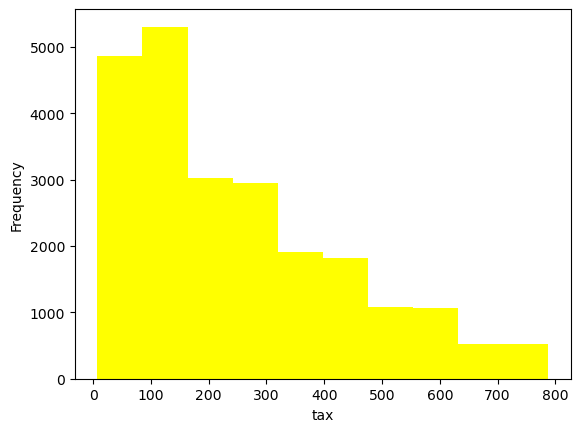

In [23]:
import matplotlib.pyplot as plt
Tax = Customer_Final['Tax']
plt.hist(Tax,color=['yellow'])
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.show()

# total amount

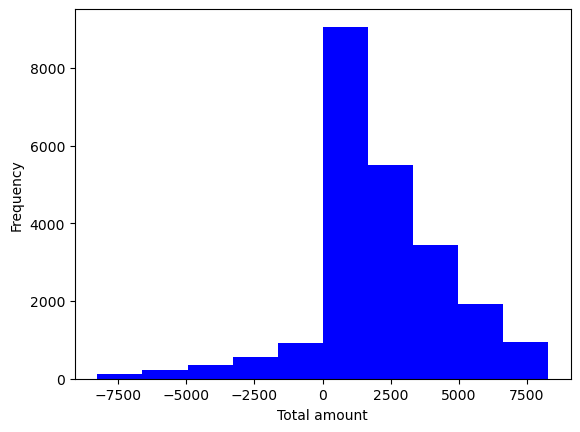

In [24]:
Total_Amt = Customer_Final['total_amt']
plt.hist(Total_Amt,color = 'Blue')
plt.xlabel('Total amount')
plt.ylabel('Frequency')
plt.show()

# Frequency Bar for Categorical variables

# gender

<AxesSubplot:>

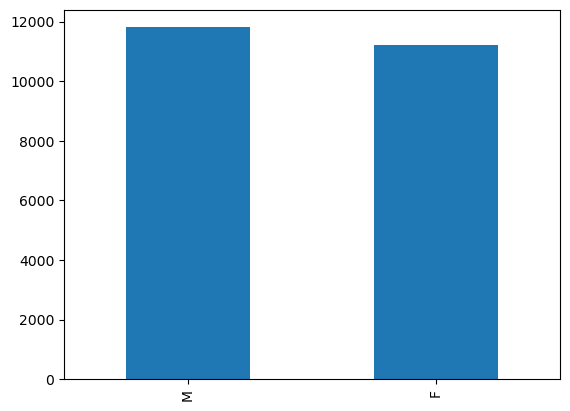

In [25]:
Customer_Final['Gender'].value_counts().plot(kind = 'bar')

# Store type

<AxesSubplot:>

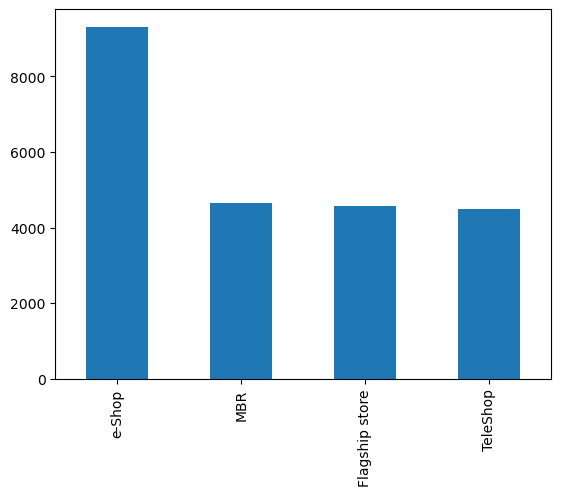

In [26]:
Customer_Final['Store_type'].value_counts().plot(kind = 'bar')

# Product category

<AxesSubplot:>

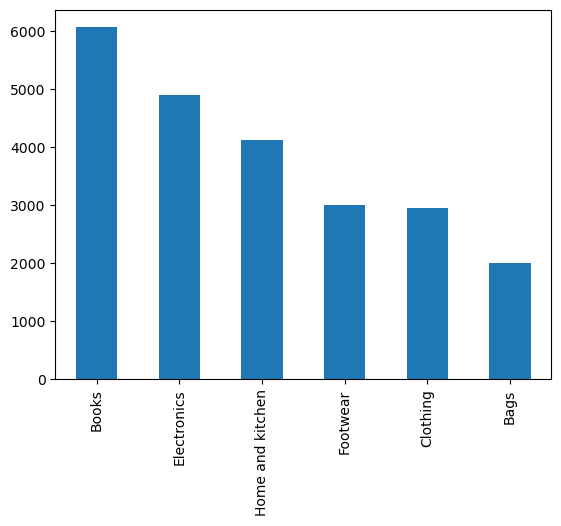

In [27]:
Customer_Final['prod_cat'].value_counts().plot(kind = 'bar')

# Product sub category

<AxesSubplot:>

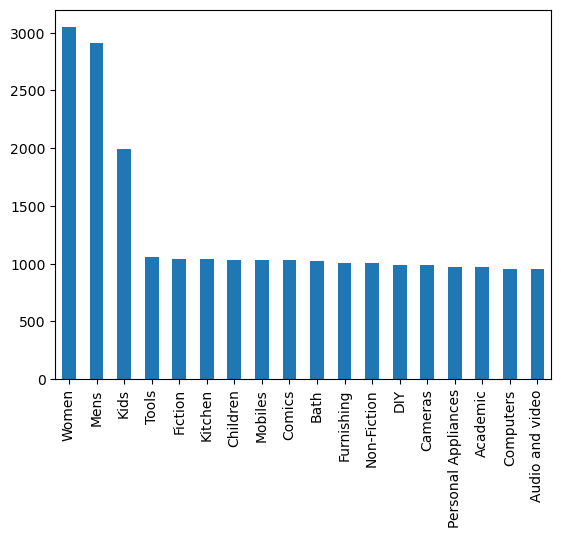

In [28]:
Customer_Final['prod_subcat'].value_counts().plot(kind = 'bar')

# Q4 Calculate the following information using the merged dataset


# Time period of the available transaction data

In [29]:
# Convert the tran_date column to datetime type
Transactions["tran_date"] = pd.to_datetime(Transactions["tran_date"])

# Get the minimum and maximum transaction dates
min_date = Transactions["tran_date"].min()
max_date = Transactions["tran_date"].max()

# Print the time period
print("Time Period:", min_date, "to", max_date)

Time Period: 2011-01-02 00:00:00 to 2014-12-02 00:00:00


C:\Users\N.SRIHARINI\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\N.SRIHARINI\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\N.SRIHARINI\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\N.SRIHARINI\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-02-2014' in DD/MM/YYYY format. 

# Count of transactions where the total amount of transaction was negative

In [30]:
# Get the count of transactions where the total amount is less than 0
negative_transactions = Transactions[Transactions["total_amt"] < 0]["transaction_id"].count()

# Print the count
print("Count of Negative Transactions:", negative_transactions)

Count of Negative Transactions: 2177


# Q5 Analyze which product categories are more popular among females vs male customers.

In [31]:
# Popular among Male
M = Customer_Final.loc[Customer_Final['Gender']=='M']
group_prod = M.groupby(['prod_cat'])['total_amt'].sum()
popular_M = group_prod.nlargest(1)
display('The most popular product category in Male customers is : ',popular_M)

# Popular among Female
F = Customer_Final.loc[Customer_Final['Gender']=='F']
group_prod1 = F.groupby(['prod_cat'])['total_amt'].sum()
popular_F = group_prod1.nlargest(1)
display('The most popular product category in Female customers is : ',popular_F)

'The most popular product category in Male customers is : '

prod_cat
Books    6645972.775
Name: total_amt, dtype: float64

'The most popular product category in Female customers is : '

prod_cat
Books    6164692.235
Name: total_amt, dtype: float64

# Q6 Which City code has the maximum customers and what was the percentage of customers from that city?¶

In [32]:
max_cust = Customer['city_code'].value_counts()
t = max_cust.nlargest(1)

display("City code which has Maximum customers is : ",t)

#percentage of customers from city code 3
tot_customer = Customer['customer_Id'].count()
percent = round((595/tot_customer)*100,2)
print("Percentage of customers from the city code 3 is {}% : ".format(percent))

'City code which has Maximum customers is : '

3.0    595
Name: city_code, dtype: int64

Percentage of customers from the city code 3 is 10.54% : 


# Q7 Which store type sells the maximum products by value and by quantity?

In [33]:
sort_list = Customer_Final.sort_values(['total_amt','Qty'],ascending = False)
display(sort_list.head(1)['Store_type'])

4193    e-Shop
Name: Store_type, dtype: object

# Q8 What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [34]:
df = pd.DataFrame(Customer_Final)
tf = df[df.prod_cat.isin(['Electronics','Clothing']) & (df.Store_type == 'Flagship store')]
total = tf.total_amt.sum()
print('Total amount earned',total)

Total amount earned 3409559.2700000005


# Q9 What was the total amount earned from "Male" customers under the "Electronics" category?

In [35]:
tf1 = df[(df.Gender == 'M') & (df.prod_cat == 'Electronics')]
total = tf1.total_amt.sum()
print('Total amount earned',total)

Total amount earned 5703109.425000001


# Q10 How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?¶

In [38]:
df1 = df[(df.total_amt > 0)]
ts = df1.transaction_id.nunique()
print('Total customers having more than 10 unique transactions are - ',ts)

Total customers having more than 10 unique transactions are -  20876


# Q11 For all customers aged between 25 - 35, find out:


# What was the total amount spent for “Electronics” and “Books” product categories?

In [36]:
# Filter the merged dataframe for customers aged 25-35
customers_25_35 = Customer_Final[(Customer_Final["DOB"] > '1989-01-01') & (Customer_Final["DOB"] < '1979-01-01')]

# Filter the dataframe for transactions made between 1st Jan, 2014 and 1st Mar, 2014
transactions_2014 = customers_25_35[(customers_25_35['tran_date'] >= '2014-01-01') & (customers_25_35['tran_date'] <= '2014-03-01')]

if transactions_2014.empty:
    print("No Data Found")
else:
    # Calculate the total amount spent by these customers during this period
    total_spent_2014 = transactions_2014["total_amt"].sum()

    # Print the total amount spent
    print("Total Amount Spent between 1st Jan, 2014 and 1st Mar, 2014:", total_spent_2014)

No Data Found


# What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [39]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

t_date = Customer_Final[(Customer_Final['tran_date'] > '2014-01-01') & (Customer_Final['tran_date'] < '2014-03-01')]
total_amount = t_date.total_amt.sum()
print('Total amount spent by the customer - ',total_amount)

Total amount spent by the customer -  1305716.62
